# Google Playstore Data Analytics Project

### Importing necessary libraries

In [1]:
!pip3 install voici

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#For getting the current time we'll import datetime and for time zone we'll import zoneinfo
from datetime import datetime
from zoneinfo import ZoneInfo as zi
import plotly.graph_objects as go
import nltk
import webbrowser
import os

In [3]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Importing the datasets

In [4]:
app_df = pd.read_csv('C:/Users/Asus/OneDrive/Desktop/Playstore Analysis/googleplaystore.csv')
rev_df = pd.read_csv('C:/Users/Asus/OneDrive/Desktop/Playstore Analysis/googleplaystore_user_reviews.csv')

### Checking the datasets

In [5]:
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
rev_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## Data Cleaning and Exploration

In [7]:
#pd.read_csv(): for csv files
#pd.read_excel(): for excel
#pd.read_sql(): SQL Database
#pd.read_json: JSON files

In [8]:
#df.isnull(): finds missing values
#df.dropna(): drops all the rowas and columns having null values from the table
#df.fillna(): replaces the missing values

In [9]:
#df.duplicated(): Indentifies the duplicates in rows
#df.drop_duplicates(): removes duplicates

### Data Cleaning

In [10]:
app_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [11]:
app_df = app_df.dropna(subset=['Rating'])
for column in app_df.columns:
    app_df[column].fillna(app_df[column].mode()[0], inplace = True)
app_df.drop_duplicates(inplace=True)
app_df= app_df[app_df['Rating'] <= 5.0]
rev_df.dropna(subset=['Translated_Review'], inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_17420\2746652995.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app_df[column].fillna(app_df[column].mode()[0], inplace = True)


In [12]:
 app_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [13]:
#converting the installs column by removing the commas an +
app_df['Installs'] = app_df['Installs'].str.replace(',', '')
app_df['Installs'] = app_df['Installs'].str.replace('+', '')

In [14]:
#converting installs type
app_df['Installs']= app_df['Installs'].astype(int)

In [15]:
#converting price to numeric
app_df['Price'] = app_df['Price'].str.replace('$','').astype(float)

In [16]:
app_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

- Merging both the datasets for future purposes

In [17]:
#merging both columns using inner join
merge_df = pd.merge(app_df, rev_df, on = 'App', how = 'inner')

In [18]:
merge_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59119,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up,Nice broser slow browsing speed... make 8mbps ...,Positive,0.100000,0.492308
59120,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up,The thing I found missing simple bookmark draw...,Positive,0.225000,0.426786
59121,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up,Great Relief unwanted pop ups showing up. What...,Positive,0.650000,0.625000
59122,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up,Hoped found new go-to; LOVE Firefox PC. Aside ...,Positive,0.345455,0.484848


### Data Transformation

In [19]:
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M',''))
    elif 'k' in size:
        return float(size.replace('k',''))//1024
    else:
        return np.nan

app_df['Size'] = app_df['Size'].apply(convert_size)

In [20]:
app_df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10834     2.6
10836    53.0
10837     3.6
10839     NaN
10840    19.0
Name: Size, Length: 8892, dtype: float64

In [21]:
app_df['Installs'] = app_df['Installs'].astype(int)
app_df['Reviews'] = app_df['Reviews'].astype(int)

#Logarithmic
app_df['Log_Installs'] = np.log(app_df['Installs'])
app_df['Log_Reviews'] = np.log(app_df['Reviews'])

In [22]:
 app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_Installs,Log_Reviews
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,9.210340,5.068904
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,13.122363,6.874198
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,15.424948,11.379508
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,17.727534,12.281384
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,11.512925,6.874198


In [23]:
def rating_group(rating):
    if rating >= 4:
        return 'Top Rated App'
    elif rating >= 3:
        return 'Above Average'
    elif rating >= 2:
        return 'Average'
    else:
        return 'Below Average'

merge_df['Rating_Group'] = merge_df['Rating'].apply(rating_group)

In [24]:
merge_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Rating_Group
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000,Above Average
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333,Above Average
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000,Above Average
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000,Above Average
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000,Above Average


In [25]:
app_df['Revenue'] = app_df['Price'] * app_df['Installs']

In [26]:
#Natural Language Processing

In [27]:
sia = SentimentIntensityAnalyzer()

In [28]:
review = 'I mean the app is bad. I hate the new feature'

sentiment_score = sia.polarity_scores(review)
print(sentiment_score)

{'neg': 0.507, 'neu': 0.493, 'pos': 0.0, 'compound': -0.802}


In [29]:
rev_df['Sentiment_Score'] = rev_df['Translated_Review'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

In [30]:
rev_df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Sentiment_Score
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667,-0.6486
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222,0.7430
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000,-0.7269
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000,0.7783
64230,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",Negative,-0.316667,0.400000,-0.0829


In [31]:
app_df['Last Updated'] = pd.to_datetime(app_df['Last Updated'], errors='coerce')

In [32]:
app_df['Year'] = app_df['Last Updated'].dt.year

### Creating Plotly graph 
- for learning purposes

In [33]:
fig = px.bar(x=['A','B','C'], y=[11,23,13], title='Sample Chart')
fig.show()

## Web Dashboard Entities
- for creating html files of each graph
- creating plot containers to import them into the web dashboard
- creating functions to reduce redundacy and for easy optimizations

In [34]:
fig.write_html('interactive_graph.html')

In [35]:
html_files_path = "./"
if not os.path.exists(html_files_path):
    os.makedirs(html_files_path)

In [36]:
plot_containers = '' #this will store out plot files
live_plot_containers = '' #this will store our live plot files
plot_insights = {} #this is a dictionary to store all the insights

In [37]:
def save_plot_as_html(fig, plot_file, insight):
    filepath = os.path.join(html_files_path, plot_file)

    html_content = pio.to_html( #storing the plot as an html file
        fig,
        full_html=True,
        include_plotlyjs='inline'
    )

    with open(filepath, "w", encoding="utf-8") as f:
        f.write(html_content)
        
    plot_insights[plot_file] = insight #this will basically pair that insight with the plot file inside the disctionary


In [38]:
def register_static_plot(filename, title): #storing static plots in one container
    global plot_containers
    insight = plot_insights.get(filename, '')
    plot_containers += f"""
    <div class="plot-container">
        <div class="plot-card" onclick="openPlot('{filename}')">
        
            <div class="plot-preview">
                <iframe src="{filename}"></iframe>
            </div>
        
            <div class="plot-overlay"></div>
        
            <div class="plot-content">
                <h3>{title}</h3>
                <p>Click to open interactive chart</p>
            </div>
        
        </div>
        {f'<div class="insight-box">{insight}</div>' if insight else ''}
    </div>
    """


def register_live_plot(filename, title, is_live_time, start, end): #storing live plots in another container
    global live_plot_containers
    insight = plot_insights.get(filename, '')

    if is_live_time:
        live_plot_containers += f"""
        <div class="plot-container">
            <div class="live-card" onclick="openPlot('{filename}')">
            
                <span class="badge">LIVE</span>
            
                <div class="plot-preview">
                    <iframe src="{filename}"></iframe>
                </div>
            
                <div class="plot-overlay"></div>
            
                <div class="plot-content">
                    <h3>{title}</h3>
                    <p>Active now</p>
                </div>
            
            </div>
            {f'<div class="insight-box">{insight}</div>' if insight else ''}
        </div>
        """

    else:
        live_plot_containers += f"""
        <div class="plot-container">
            <div class="live-card disabled">
                <div class="plot-content">
                    <h3>{title}</h3>
                    <p>Available {start}–{end} PM IST</p>
                </div>
            </div>
        </div>
        """


# Plots

### Category Graph

In [39]:
category_counts = app_df['Category'].value_counts().nlargest(10)
category_counts

Category
FAMILY             1718
GAME               1074
TOOLS               734
PRODUCTIVITY        334
FINANCE             317
PERSONALIZATION     310
COMMUNICATION       307
LIFESTYLE           305
PHOTOGRAPHY         304
MEDICAL             302
Name: count, dtype: int64

In [40]:
plot_title = 'Top Ranking Categories on Playstore'

fig1= px.bar(
    x = category_counts.index,
    y = category_counts.values,
    labels = {'x': 'Category', 'y': 'Count'},
    title = plot_title,
    color = category_counts.index,
    color_discrete_sequence = px.colors.sequential.Plasma,
)

fig1.update_layout(
    plot_bgcolor = 'black',
    paper_bgcolor = 'black',
    font_color = 'white',
    title_font = {'size': 16},
    xaxis = dict(title_font= {'size': 12}),
    yaxis = dict(title_font= {'size': 12}),
    margin = dict(l=10, r=10, t=30, b=10)
)

fig1.update_traces(marker=dict(line=dict(color='white', width=1)))

save_plot_as_html(
    fig1,
    "Category_Graph_1.html",
    "The top categories on the Play Store are dominated by tools, entertainment, and productivity apps."
)

register_static_plot(
    "Category_Graph_1.html",
    plot_title
)

## Type Analysis Graph

In [41]:
type_counts = app_df['Type'].value_counts().nlargest(10)
type_counts

Type
Free    8279
Paid     613
Name: count, dtype: int64

In [42]:
plot_title = 'App Type Distribution'

fig2= px.pie(
    values = type_counts.values,
    names = type_counts.index,
    title = plot_title,
    color_discrete_sequence = px.colors.sequential.RdBu,
)

fig2.update_layout(
    plot_bgcolor = 'black',
    paper_bgcolor = 'black',
    font_color = 'white',
    title_font = {'size': 16},
    xaxis = dict(title_font= {'size': 12}),
    yaxis = dict(title_font= {'size': 12}),
    margin = dict(l=10, r=10, t=30, b=10)
)

fig2.update_traces(marker=dict(line=dict(color='white', width=1)))
save_plot_as_html(fig2, "Type_Analysis_Graph.html", "Most apps on playstore are free, so apps monetize through ads or in app purchases")
register_static_plot(
    "Type_Analysis_Graph.html",
    plot_title
)

## Rating Distribution Graph

In [43]:
plot_title = 'Rating Distribution'

fig3 = px.histogram(
    app_df,
    x = 'Rating',
    nbins = 20,
    title = plot_title,
    color_discrete_sequence =["#636EFA"],
)

fig3.update_layout(
    plot_bgcolor = 'black',
    paper_bgcolor = 'black',
    font_color = 'white',
    title_font = {'size': 16},
    xaxis = dict(title_font= {'size': 12}),
    yaxis = dict(title_font= {'size': 12}),
    margin = dict(l=10, r=10, t=30, b=10)
)


fig3.update_traces(marker=dict(line=dict(color='white', width=1)))
save_plot_as_html(fig3, "Rating_Distribution_Graph.html", "Ratings are skewed towards higher values, suggesting that most apps are rated favourably on the store by users")
register_static_plot(
    'Rating_Distribution_Graph.html',
    plot_title
)

## Sentiment Score Chart 

In [44]:
sentiment_counts = rev_df['Sentiment_Score'].value_counts()
sentiment_counts

Sentiment_Score
 0.0000    3978
 0.4404    1436
 0.6369     980
 0.6249     827
 0.4215     633
           ... 
 0.1476       1
-0.8633       1
 0.6802       1
 0.9155       1
-0.0829       1
Name: count, Length: 4968, dtype: int64

In [45]:
plot_title = 'Sentiment Distribution'

fig4= px.bar(
    x = sentiment_counts.index,
    y = sentiment_counts.values,
    labels = {'x': 'Sentiment Score', 'y': 'Count'},
    title = plot_title,
    color = sentiment_counts.index,
    color_discrete_sequence = px.colors.sequential.Plasma,
)

fig4.update_layout(
    plot_bgcolor = 'black',
    paper_bgcolor = 'black',
    font_color = 'white',
    title_font = {'size': 16},
    xaxis = dict(title_font= {'size': 12}),
    yaxis = dict(title_font= {'size': 12}),
    margin = dict(l=10, r=10, t=30, b=10)
)


fig4.update_traces(marker=dict(line=dict(color='white', width=1)))
save_plot_as_html(fig4, "Sentiment_Score_Graph.html", "Sentiments in the graph show a slight mix of positive and negative reviews with a slight lean towards positive sentiments")
register_static_plot(
    'Sentiment_Score_Graph.html',
    plot_title
)

  ## Installs by Category

In [46]:
installs_by_category = app_df.groupby('Category')['Installs'].sum().nlargest(10)
installs_by_category

Category
GAME                  31543862717
COMMUNICATION         24152241530
SOCIAL                12513841475
PRODUCTIVITY          12463070180
TOOLS                 11450724500
FAMILY                10041130590
PHOTOGRAPHY            9721243130
TRAVEL_AND_LOCAL       6361859300
VIDEO_PLAYERS          6221897200
NEWS_AND_MAGAZINES     5393110650
Name: Installs, dtype: int64

In [47]:
plot_title = 'Installs by Category'

fig5= px.bar(
    x = installs_by_category.index,
    y = installs_by_category.values,
    orientation = 'h',
    labels = {'x': 'Installs', 'y': 'Category'},
    title = plot_title,
    color = installs_by_category.index,
    color_discrete_sequence = px.colors.sequential.Blues,
)

fig5.update_layout(
    plot_bgcolor = 'black',
    paper_bgcolor = 'black',
    font_color = 'white',
    title_font = {'size': 16},
    xaxis = dict(title_font= {'size': 12}),
    yaxis = dict(title_font= {'size': 12}),
    margin = dict(l=10, r=10, t=30, b=10)
)


fig5.update_traces(marker=dict(line=dict(color='white', width=1)))
save_plot_as_html(fig5, "Installs_By_Category_Graph.html", "The Categories with the most installs are socials and communication app, reflecting their broad appeal")
register_static_plot(
    'Installs_By_Category_Graph.html',
    plot_title
)

## Line Graph

In [48]:
plot_title = 'Number of Updates Over the Years'

updates_per_year = app_df['Last Updated'].dt.year.value_counts().sort_index()
fig6 = px.line(
    x=updates_per_year.index,
    y=updates_per_year.values,
    labels={'x': 'Year', 'y': 'Number of Updates'},
    title= plot_title,
    color_discrete_sequence=['#AB63FA'],

)
fig6.update_layout(
    plot_bgcolor = 'black',
    paper_bgcolor = 'black',
    font_color = 'white',
    title_font = {'size': 16},
    xaxis = dict(title_font= {'size': 12}),
    yaxis = dict(title_font= {'size': 12}),
    margin = dict(l=10, r=10, t=30, b=10)
)


fig6.update_traces(marker=dict(line=dict(color='white', width=1)))
save_plot_as_html(fig6, "Line_Graph.html", "Updates have been increasing over the years, showing that developers are actively maintaining and improving their apps.")
register_static_plot(
    'Line_Graph.html',
    plot_title
)

 ## Revenue by Category Graph

In [49]:
revenue_by_category = app_df.groupby('Category')['Revenue'].sum().nlargest(10)
revenue_by_category

Category
FAMILY             1.857743e+08
LIFESTYLE          5.758394e+07
GAME               4.098684e+07
FINANCE            2.572664e+07
PHOTOGRAPHY        8.941050e+06
MEDICAL            8.371355e+06
PERSONALIZATION    7.786310e+06
TOOLS              5.462910e+06
SPORTS             4.706154e+06
PRODUCTIVITY       4.304452e+06
Name: Revenue, dtype: float64

In [50]:
fig7= px.bar(
    x = revenue_by_category.index,
    y = revenue_by_category.values,
    labels = {'x': 'Category', 'y': 'Revenue'},
    title = 'Revenue by Category',
    color = revenue_by_category.index,
    color_discrete_sequence = px.colors.sequential.Greens,
)

fig7.update_layout(
    plot_bgcolor = 'black',
    paper_bgcolor = 'black',
    font_color = 'white',
    title_font = {'size': 16},
    xaxis = dict(title_font= {'size': 12}),
    yaxis = dict(title_font= {'size': 12}),
    margin = dict(l=10, r=10, t=30, b=10)
)

fig7.update_traces(marker=dict(line=dict(color='white', width=1)))
save_plot_as_html(fig7, "Revenue_by_Category.html", "The Categories with the most revenue are Family and Lifestyle apps")



## Genre Count Plot

In [51]:
genre_count = app_df['Genres'].str.split(';', expand= True).stack().value_counts().nlargest(10)
genre_count

Tools              734
Education          626
Entertainment      538
Action             364
Productivity       334
Finance            317
Personalization    310
Communication      308
Lifestyle          306
Photography        304
Name: count, dtype: int64

In [52]:
plot_title = "Top 10 Most Popular Genres"

fig8= px.bar(
    x = genre_count.index,
    y = genre_count.values,
    labels = {'x': 'Genre', 'y': 'Frequency'},
    title = plot_title,
    color = genre_count.index,
    color_discrete_sequence = px.colors.sequential.Reds,

)

fig8.update_layout(
    plot_bgcolor = 'black',
    paper_bgcolor = 'black',
    font_color = 'white',
    title_font = {'size': 16},
    xaxis = dict(title_font= {'size': 12}),
    yaxis = dict(title_font= {'size': 12}),
    margin = dict(l=10, r=10, t=30, b=10)
)

fig8.update_traces(marker=dict(line=dict(color='white', width=1)))
save_plot_as_html(fig8, "Genre_Count_Graph.html", "Genres which are the most common are Tools and Education, reflecting users' preferences for learning and exploration")
register_static_plot(
    'Genre_Count_Graph.html',
    plot_title
)

## Scatter Plots

In [53]:
plot_title = 'Impact of Last Update on Rating'

fig9 = px.scatter(
    app_df,
    x = 'Last Updated',
    y = 'Rating',
    color = 'Type',
    title = plot_title,
    color_discrete_sequence = px.colors.qualitative.Vivid,

)

fig9.update_layout(
    plot_bgcolor = 'black',
    paper_bgcolor = 'black',
    font_color = 'white',
    title_font = {'size': 16},
    xaxis = dict(title_font= {'size': 12}),
    yaxis = dict(title_font= {'size': 12}),
    margin = dict(l=10, r=10, t=30, b=10)
)

fig9.update_traces(marker=dict(line=dict(color='white', width=1)))
save_plot_as_html(fig9, "Update_on_Rating_Graph.html", "From this graph we can conclude that over the years as the popularity of apps atrted growing and the density of apps started rising, the number of updates also started increasing significantly")
register_static_plot(
    'Update_on_Rating_Graph.html',
    plot_title
)

## Box Plot

In [54]:
plot_title = 'Rating for Paid vs Free'

fig10 = px.box(
    app_df,
    x = 'Type',
    y = 'Rating',
    color = 'Type',
    title = plot_title,
    color_discrete_sequence = px.colors.qualitative.Pastel,

)

fig10.update_layout(
    plot_bgcolor = 'black',
    paper_bgcolor = 'black',
    font_color = 'white',
    title_font = {'size': 16},
    xaxis = dict(title_font= {'size': 12}),
    yaxis = dict(title_font= {'size': 12}),
    margin = dict(l=10, r=10, t=30, b=10)
)

fig10.update_traces(marker=dict(line=dict(color='white', width=1)))
save_plot_as_html(fig10, "Paid_Free_Graph.html", "Paid apps generally have higher ratings compared to free apps suggesting that users expect higher quality from apps they pay for")
register_static_plot(
    'Paid_Free_Graph.html',
    plot_title
)

In [55]:
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_Installs,Log_Reviews,Revenue,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,9.210340,5.068904,0.0,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,13.122363,6.874198,0.0,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,15.424948,11.379508,0.0,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,17.727534,12.281384,0.0,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,11.512925,6.874198,0.0,2018


In [56]:
rev_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Sentiment_Score
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,0.9531
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,0.6597
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,0.6249
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,0.6369
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,0.6369


In [57]:
merge_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Rating_Group
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000,Above Average
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333,Above Average
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000,Above Average
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000,Above Average
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000,Above Average


# Internship Tasks

### 1. Use a grouped bar chart to compare the average rating and total review count for the top 10 app categories by number of installs. Filter out any categories where the average rating is below 4.0 and size below 10 M and last update should be Jan month . this graph should work only between 3PM IST to 5 PM IST apart from that time we should not show this graph in dashboard itself.

In [58]:
#Firstly we have to filter out the categories where:
#1. Average Rating is below 4
#2. Size should be below 10M
#3. Last update should be January

category_stats_filter = app_df[(app_df['Rating'] >= 4) &
    (app_df['Size'] >= 10.0) &
    (app_df['Last Updated'].dt.month == 1)
]

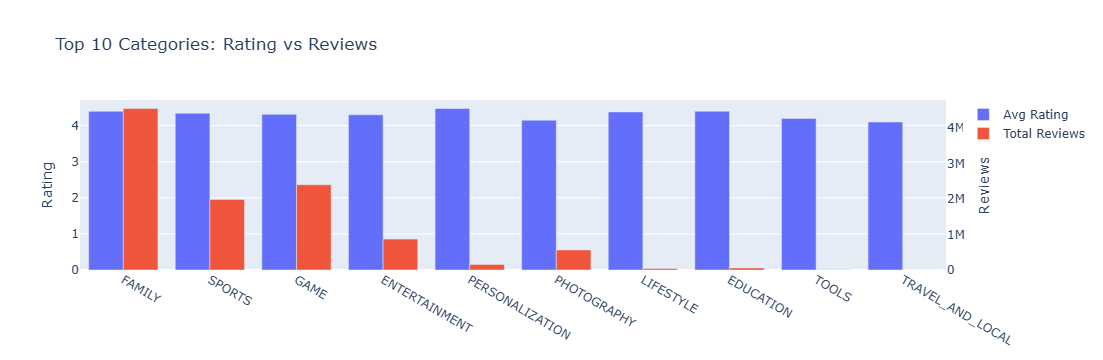

In [59]:
# Now we'll use that filtered DataFrame to find the category stats AND we need to only show the timings between 3PM IST to 5 PM IST
#getting the ist
ist = datetime.now(zi('Asia/Kolkata'))

#getting current hour extracted from ist
current_hr = ist.hour
plot_title = 'Top 10 Categories: Rating vs Reviews'

#Here we aggregated the values in the category_stats to see which top 10 categories had the most number of reviews and also had average ratings better than 4.0
category_stats = category_stats_filter.groupby('Category').agg({
        'Rating': 'mean',
        'Reviews': 'sum',
        'Installs': 'sum'
    }).nlargest(10, 'Installs')

category_stats_reset = category_stats.reset_index()

fig11 = go.Figure() #Here we will be using Plotly Go for a structural plotting rather than Express
#LEARNINGS: Plotly Go

#To create a grouped bar chart we will be spliting the y axis into two parts one on the right side and another on the left side
#Here we created the first bar graph in which we are seeing the average ratings of for each category on left part of the y axis
fig11.add_bar(
    x = category_stats_reset['Category'],
    y = category_stats_reset['Rating'], 
    name = 'Avg Rating', 
    yaxis = 'y1',
    offsetgroup = 1 #assigning one side of the graph to these bars
)

#We created another bar graph but this time on the rightmost Y-axis of the graph showing the total number of reviews per category
fig11.add_bar(
    x = category_stats_reset['Category'],
    y = category_stats_reset['Reviews'], 
    name = 'Total Reviews',
    yaxis = 'y2',
    offsetgroup = 2 #another side to these
)

#Updatin the format of the graph for a better visual appearance
fig11.update_layout(
    title = plot_title,
    barmode = 'group',
    yaxis = dict(title = 'Rating'),
    yaxis2= dict(title = 'Reviews',
                overlaying='y', #this code here is important as it is actually making the 'Average Ratings' appear on the right of the graph
                side='right',
                showgrid=False)
)

#Viewing the graph
fig11.show()


#Saving the plot as an html file
save_plot_as_html(fig11, 
                  'Category_Stats.html', 
                  "From the following stats it's clearly understandable that even though Family Apps are much more installed and reviewed they still managed to get better average ratings as compared to other apps")

#saving the graph as a live graph using the function we created

#This variable will tell the dashboard about the time to make this particular graph live 
#Each graph have a different time slot to go live 
#the timing can be easily modified by just changing the timings in this variable
is_live_time = (15 <= current_hr < 17)
register_live_plot(
    'Category_Stats.html',
    plot_title,
    is_live_time,
    3, 5 #these constants shows graph will go live between 3PM and 5PM IST on the dashboard for a better UX
)


### 2. Create an interactive Choropleth map using Plotly to visualize global installs by Category. Apply filters to show data for only the top 5 app categories and highlight category where the number of installs exceeds 1 million. The app category should not start with the characters “A,” “C,” “G,” or “S.” This graph should work only between 6 PM IST and 8 PM IST; apart from that time, we should not show it in the dashboard itself.

C:\Users\Asus\AppData\Local\Temp\ipykernel_17420\1489591601.py:32: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



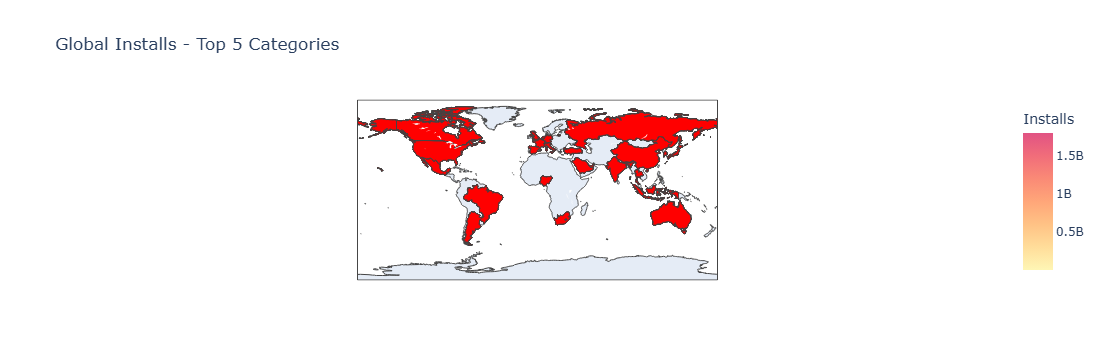

In [60]:
#Inorder to create a Choropleth map we need geographic data but as our dataset doesn't have any we'll create our own synthetic data and add it to our dataset
#Creating a list of random countries
countries = [
    "India", "United States", "Brazil", "Germany", "Canada",
    "United Kingdom", "France", "Australia", "Japan", "South Korea",
    "Mexico", "Italy", "Spain", "Netherlands", "Russia",
    "China", "Indonesia", "South Africa", "Argentina", "Turkey",
    "Saudi Arabia", "UAE", "Singapore", "Thailand", "Nigeria"
]

#made a seed so that we get the same result every time
np.random.seed(42)

#Checking if it's time to publish the graph on the webpage or not
#Creating a filter for the categories containing certain letters
filtered_df = app_df[~app_df['Category'].str.startswith(('A', 'C', 'G', 'S'))]

#First let's find the top 5 categories
top_5_categories = filtered_df.groupby('Category')['Installs'].sum().nlargest(5).index #with this index function we extract only the category column from the dataframe

#Adding those countries in a new copy of this filtered dataframe 
map_df = filtered_df[filtered_df['Category'].isin(top_5_categories)].copy()
map_df["Country"] = np.random.choice(countries, size=len(map_df))


#Applying groupby function on the new dataframe
map_data = map_df.groupby(['Country', 'Category'])['Installs'].sum().reset_index()

plot_title = 'Global Installs - Top 5 Categories'

#Creating the normal choropleth map for top 5 categories 
fig12 = px.choropleth(
    map_data,
    locations = 'Country',
    locationmode = 'country names',
    color= 'Installs',
    color_continuous_scale = 'Pinkyl',
    hover_data = ['Category', 'Installs'],
    title = plot_title
)

highlight_df = map_data[map_data['Installs'] > 1_000_000]


#now in this part we are adding the highlights to the graph but as the data is synthetic the highlight apply universally
fig12.add_choropleth(
    locations = highlight_df['Country'],
    locationmode = 'country names',
    z = [1] * len(highlight_df),   #creating dummy values as for adding highlights we are not using the installs column from our filtered dataset
    colorscale = [[0, 'red'],[1, 'red']], #defines the start and end of the color scale so as both have red the country will be highlighted as red no matter the number of installs
    showscale = False,
    hoverinfo = 'skip'
)


fig12.show()


#saved the plot to make it appear in the html file
save_plot_as_html(fig12, 'Choropleth_Graph.html', "As we didn't have the geographic data we added our own synthetic data into the dataframe and created the graph")
is_live_time = (18 <= current_hr < 20)
register_live_plot(
    'Choropleth_Graph.html',
    plot_title,
    is_live_time,
    6, 8
)

### 3. Create a dual-axis chart comparing the average installs and revenue for free vs. paid apps within the top 3 app categories. Apply filters to exclude apps with fewer than 10,000 installs and revenue below $10,000 and android version should be more than 4.0 as well as size should be more than 15M and content rating should be Everyone and app name should not have more than 30 characters including space and special character .this graph should work only between 1 PM IST to 2 PM IST apart from that time we should not show this graph in dashboard itself.

In [61]:
#Removing "and up" from Android Version column and splitting from '.' to get the version of the app (we only care about the major version of the app which is the very first number)
app_df['Android Ver'] = app_df['Android Ver'].str.replace(' and up', '')
app_df['Major_Ver'] = app_df['Android Ver'].str.split('.').str[0]
app_df['Minor_Ver'] = app_df['Android Ver'].str.split('.').str[1].fillna(0) #adding a 0 if there is no number
app_df['Major_Ver'] = pd.to_numeric(app_df['Major_Ver'], errors='coerce')
app_df['Minor_Ver'] = pd.to_numeric(app_df['Minor_Ver'], errors='coerce')

#Creating a filtered data frame to add all the filters
filtered_dual_axis = app_df[ 
    (app_df['Installs'] >= 10000) &           
    (
        #As by the logic if we filter out every app having <10,000 revenue then all the free apps will be filtered out therefore we won't be able to create a comparison graph
        (app_df["Type"] == "Free") | #this logic will keep the free apps even if the revenue is 0 assuming the <10000 fiter is only meant for paid apps
        ((app_df["Type"] == "Paid") & (app_df["Revenue"] >= 10_000)) 
    ) &
    (app_df['Size'] > 15.0) &             
    (app_df['Content Rating'] == 'Everyone') & 
    (app_df['App'].str.len() <= 30) &              
    (                                             
        (app_df['Major_Ver'] > 4) | #and this will keep the versions 5.0, 6.0 etc included too
        ((app_df['Major_Ver'] == 4) & (app_df['Minor_Ver'] > 0))
    )
]


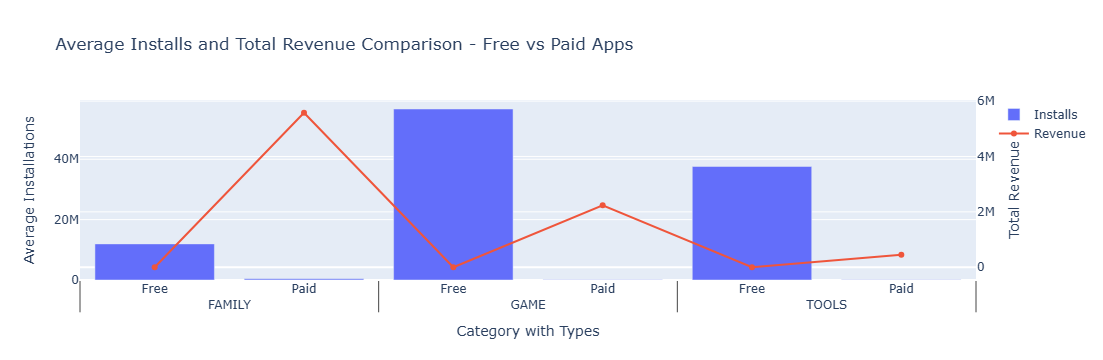

In [62]:
#Now that we created a filtered df now we'll apply grouping on this df

#from the filtered dataframe we are taking the top 3 categories based on highest installs
top_3 = filtered_dual_axis.groupby('Category')['Installs'].sum().nlargest(3).index #creates those categories as indexes


filtered_top = filtered_dual_axis[filtered_dual_axis['Category'].isin(top_3)]

#now we apply groupby on category and type with aggregate functions to get the average installs and the total revenue together
dual_axis = filtered_top.groupby(['Category', 'Type']).agg({
    'Installs': 'mean',
    'Revenue': 'sum'
}).reset_index()

plot_title = 'Average Installs and Total Revenue Comparison - Free vs Paid Apps'

fig13 = go.Figure()

#Creating the first side of the graph which is the 'Bar' chart having the average installs
# Update the Bar chart
fig13.add_trace(
    go.Bar( 
        x=[dual_axis['Category'], dual_axis['Type']],  # Multi-level x-axis
        y=dual_axis['Installs'],
        name='Installs',
        yaxis='y'
    )
)

# Update the Line chart
fig13.add_trace(
    go.Scatter(
        x=[dual_axis['Category'], #here we are using both category and type aa X axis
           dual_axis['Type']],
        y=dual_axis['Revenue'],
        name='Revenue',
        yaxis='y2',
        mode='lines+markers'
    )
)

#Updating the layout of the graph
fig13.update_layout(
    
    barmode='group',
   #Layout of the first axis
    yaxis = dict(
        title = 'Average Installations',
        side='left'
    ),
    #Layout of the second axis
    yaxis2 = dict(
        title = 'Total Revenue',
        side = 'right',
        overlaying = 'y'
    ),
    #Layout of the x axis
    xaxis= dict(title="Category with Types"),
    title= plot_title
)

fig13.show()

save_plot_as_html(fig13, "Dual_Axis_Graph.html", "From this dual axis graph we can conclude that even though the installs of Paid apps are significantly lesser than that of Free apps the revenue generated by the paid apps is extremely high whereas the free apps did't generate any revenue (assuming no ads were enabled in the Free apps)")
is_live_time = (13 <= current_hr < 14)
register_live_plot(
    'Dual_Axis_Graph.html',
    plot_title,
    is_live_time,
    1, 2
)

### 4. Plot a time series line chart to show the trend of total installs over time, segmented by app category. Highlight periods of significant growth by shading the areas under the curve where the increase in installs exceeds 20% month-over-month and app name should not starts with x, y ,z and app category should start with letter " E " or " C " or " B " and We have to translate the Beauty category in Hindi and Business category in Tamil and Dating category in German while showing it on Graph. reviews should be more than 500 the app name should not contain letter "S" as well as this graph should work only between 6 PM IST to 9 PM IST apart from that time we should not show this graph in dashboard itself

In [63]:
#Let's start by filtering the dataset
filtered_time_series = app_df[
    (~app_df['App'].str.lower().str.startswith(('x', 'y', 'z'))) &
    (app_df['Category'].str.startswith(('E', 'C', 'B'))) &
    (app_df['App'].str.contains('S', case = False)) &
    (app_df['Reviews'] > 500)
].copy()

#translating the categories and mapping them with the original categores that'll be replaced
translated_categories = {
    "BEAUTY": "सौंदर्य", #Hindi
    "BUSINESS": "வணிகம்", #Tamil
    "DATING": "DATING (Partnersuche)" #German (Dating is called Dating only in German or Partnersuche (Literal meaning is partner search))
}

In [64]:
#here we'll replace the translated categories in the main data frame
filtered_time_series['Category'] = filtered_time_series['Category'].replace(translated_categories)

time_series = filtered_time_series.groupby([pd.Grouper(key='Last Updated', freq='ME'), 'Category'])['Installs'].sum().reset_index() 
#freq = ME: we are slicing each month block by the end of the month

#IMPORTANT LEARNING: Learned the new grouper function of pandas. This task was comparatively tough to figure out but learned some important features in this task

'''
USAGE OF THE GROUPER FUNCTION:
using grouper we sliced the last updated column with the frequency of month ends so that the dates don't look
random and are forced into the same representative timestamp (the month end). So,

- 2018-08-01
- 2018-08-06   --->  2018-08-31  (are treated as 2018-08-31 for grouping purposes)
- 2018-08-27
'''


#Re sorting the dataframe so that installs will be grouped by categories
time_series = time_series.sort_values(['Category', 'Last Updated'])
time_series['Percent_change'] = time_series.groupby('Category')['Installs'].pct_change()


#Here we created a boolean column containing True and False values. It'll be true whenever the Precentage Change is more than 20% (0.20)
time_series['Sign_gwth'] = time_series['Percent_change'] > 0.20
time_series

,Last Updated,Category,Installs,Percent_change,Sign_gwth
0,2011-09-30,BOOKS_AND_REFERENCE,1000000,NaN,False
2,2014-07-31,BOOKS_AND_REFERENCE,50000,-0.950000,False
3,2015-02-28,BOOKS_AND_REFERENCE,50000,0.000000,False
6,2015-06-30,BOOKS_AND_REFERENCE,100000,1.000000,True
23,2016-12-31,BOOKS_AND_REFERENCE,500000,4.000000,True
...,...,...,...,...,...
76,2018-04-30,வணிகம்,50200000,21.818182,True
84,2018-05-31,வணிகம்,52000000,0.035857,False
92,2018-06-30,வணிகம்,12650000,-0.756731,False
100,2018-07-31,வணிகம்,118500000,8.367589,True


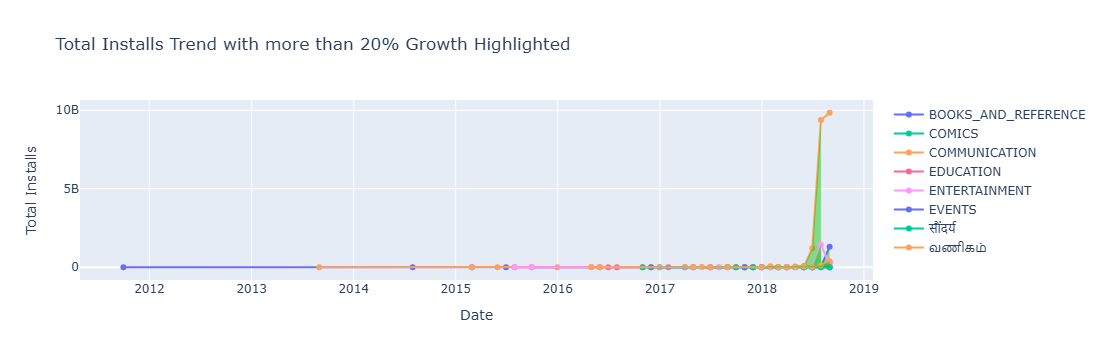

In [65]:
#Creating the graph
fig14 = go.Figure()

plot_title = 'Total Installs Trend with more than 20% Growth Highlighted'

#This graph is pretty complex as we need to create a time series for each category
#so to achieve that we'll be using for loop which is gonna iterate over the 'Category' column and for each category we'll be performing operations
for categ in time_series['Category'].unique():
    category_df = time_series[time_series['Category'] == categ]
    
    #Operation 1: We are creating lines (with markers) for each category for duration of the entire timeline
    fig14.add_trace(go.Scatter(
        x = category_df['Last Updated'], 
        y = category_df['Installs'], 
        mode = 'lines + markers',
        name = categ
    ))

    #creating a new variable to shade only where growth is more that 20 percent
    highlight_y = category_df['Installs'].where(category_df['Sign_gwth'])

    #Operation 2: Here we are creating the shaded area for each category whenever the growth is more that 20%
    fig14.add_trace(go.Scatter(
        x = category_df['Last Updated'],
        y = highlight_y,
        fill = 'tozeroy', #This is the main element that's creating the entire area under the graph till 0 (to_0_y)
        mode = 'none',
        fillcolor = 'rgba(0, 200, 0, 0.45)',
        showlegend = False
    ))

fig14.update_layout(
    title= plot_title,
    xaxis_title='Date',
    yaxis_title='Total Installs'
)

fig14.show()

save_plot_as_html(fig14, 'Time_Series_Graph.html', 'In this graph the we can observe that 2018 was the most pivitol point for the selected categories as we saw a huge spike in the installs especially during the month of July 2018')
is_live_time = (18 <= current_hr < 21)
register_live_plot(
    'Time_Series_Graph.html',
    plot_title,
    is_live_time,
    6, 9
)

### 5. Plot a bubble chart to analyze the relationship between app size (in MB) and average rating, with the bubble size representing the number of installs. Include a filter to show only apps with a rating higher than 3.5 and that belong to the Game, Beauty ,business , commics , commication , Dating , Entertainment , social and event categories. Reviews should be greater than 500 and the app name should not contain letter "S" and sentiment subjectivity should be more than 0.5 and highlight the Game Category chart in Pink color. We have to translate the Beauty category in Hindi and Business category in Tamil and Dating category in German while showing it on Graphs. Installs should be more than 50k as well as this graph should work only between 5 PM IST to 7 PM IST apart from that time we should not show this graph in dashboard itself.

In [66]:
#Here we'll be finally using the mereged dataframe we created earlier
merge_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [67]:
#Doing data transformation on this one too just like our previous dataframes
merge_df.dtypes
merge_df['Installs'] = merge_df['Installs'].astype(int)
merge_df['Reviews'] = merge_df['Reviews'].astype(int)
merge_df['Size'] = merge_df['Size'].apply(convert_size)

In [68]:
#making filtered dataframe
#Filtering the dataframe

#We used merged dataframe because we are using santiment_subjectivity for filtering alongside of the other app_df columns
filtered_bubble = merge_df[
    (merge_df['Rating'] > 3.5) &
    (merge_df['Category'].isin([ #filtering the categories which we need
        'GAME',
        'BEAUTY',
        'BUSINESS',
        'COMICS',
        'COMMUNICATION',
        'DATING',
        'ENTERTAINMENT',
        'SOCIAL',
        'EVENTS'
    ])) &
    (merge_df['Reviews'] > 500) &
    (~merge_df['App'].str.contains('S', case = False)) &
    (merge_df['Sentiment_Subjectivity'] > 0.5) &
    (merge_df['Installs'] > 50_000)
].copy()

In [69]:
filtered_bubble['Category'] = filtered_bubble['Category'].replace(translated_categories) #As we already made the translated the same categories in same languages we used the same previous map

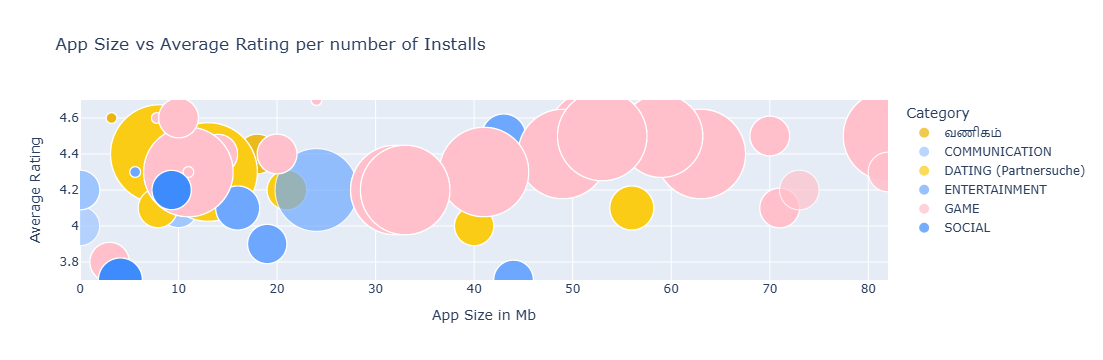

In [70]:
color_map = {
        'GAME': 'pink', #Highlighting Games bubbles with pink color
    
        'सौंदर्य': '#FDE68A', #the translated group also deserve a new color group
        'வணிகம்': '#EAB308',
        'DATING (Partnersuche)': '#FACC15',
    
        'COMICS': '#CFE2FF', #other categories have shades of blue for better aesthetics
        'COMMUNICATION': '#9EC5FE', 
        'ENTERTAINMENT': '#6EA8FE',
        'SOCIAL': '#3D8BFD'
}

plot_title = 'App Size vs Average Rating per number of Installs'

#This is just a scatter plot but here we are specifically mentioning the size of each bubble to fill in with the total number of installs
#making bubbles of different sizes
fig15 = px.scatter(
        filtered_bubble,
        x = 'Size', #here we used the x axis as size
        y = 'Rating', #y axis as rating
        size = 'Installs', #size of the bubbles are number of installs
        color = 'Category', #color as category
        hover_name = 'App', 
        size_max = len(filtered_bubble), #this will create bubbles as per the size of the apps in the filtered dataset
        title = plot_title,
        color_discrete_map = color_map
    )

fig15.update_layout(
    xaxis_title = 'App Size in Mb',
    yaxis_title = 'Average Rating'
)

fig15.show()

is_live_time = (17 <= current_hr < 19)
save_plot_as_html(fig15, 'Bubble_Chart.html', 'In this chart it is clearly observable that games have much more ratings as compared to other categories even though games have comparatively higher app size')
register_live_plot(
    'Bubble_Chart.html',
    plot_title,
    is_live_time,
    5, 7
)


### 6. You are required to create a stacked area chart to visualize the cumulative number of installs over time for each app category, with each category represented as a separate color band in the chart. Apply the following filters before plotting: include only apps with an average rating of at least 4.2, app names that do not contain any numbers, app categories that start with the letter “T” or “P,” reviews greater than 1,000, and app sizes between 20 MB and 80 MB. In the chart legend, translate “Travel & Local” into French, “Productivity” into Spanish, and “Photography” into Japanese. Highlight by increasing the color intensity for any month where total installs increased by more than 25% month-over-month for any category. This visualization must only be displayed between 4 PM IST and 6 PM IST, and it should not appear on the dashboard outside this time window

In [71]:
#Filtering the dataframe
filtered_stacked = app_df[
    (app_df['Rating'] >= 4.2) &
    (~app_df['App'].str.contains(r'\d', na = False)) &
    (app_df['Category'].str.startswith(('T', 'P'))) &
    (app_df['Reviews'] > 1000) &
    (app_df['Size'] < 80) & (app_df['Size'] > 20) 
].copy()
filtered_stacked['Category'].unique()

array(['PHOTOGRAPHY', 'TRAVEL_AND_LOCAL', 'TOOLS', 'PERSONALIZATION',
       'PRODUCTIVITY', 'PARENTING'], dtype=object)

In [72]:
#Crating the translated legends
translated_legends = {
    "TRAVEL_AND_LOCAL": "VOYAGES_ET_LOCAL",    #French
    "PRODUCTIVITY": "PRODUCTIVIDAD",           #Spanish
    "PHOTOGRAPHY": "写真"                      #Japanese
}

In [73]:
#Repacing the legends withe translated ones
filtered_stacked['Category'] = filtered_stacked['Category'].replace(translated_legends)

In [74]:
filtered_stacked['Category'].unique()

array(['写真', 'VOYAGES_ET_LOCAL', 'TOOLS', 'PERSONALIZATION',
       'PRODUCTIVIDAD', 'PARENTING'], dtype=object)

In [75]:
#Same strat we used in the time series graph as we need a time wise installation timeline
stacked_graph = filtered_stacked.groupby([pd.Grouper(key='Last Updated', freq='ME'), 'Category'])['Installs'].sum().reset_index()

In [76]:
stacked_graph = stacked_graph.sort_values(['Category', 'Last Updated'])

In [77]:
stacked_graph['Percentage_Change'] = stacked_graph.groupby('Category')['Installs'].pct_change()
stacked_graph['Highlight'] =  stacked_graph['Percentage_Change'] > 0.25
highlight_months = (stacked_graph[stacked_graph['Highlight']]['Last Updated'].drop_duplicates())

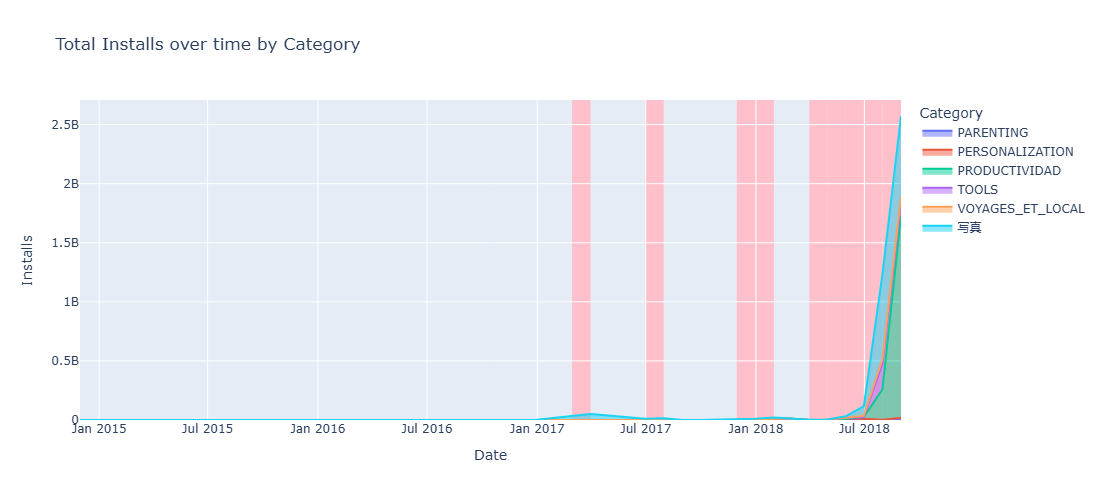

In [78]:
#In this graph we used Express and Go as go would be used to create the highlighted areas
fig16 = go.Figure()

plot_title = 'Total Installs over time by Category'

#This will create an area graph for each category and stack them on top of each other 
fig16 = px.area(
    stacked_graph,
    x='Last Updated',
    y='Installs',
    color='Category',
    title='Total Installs Over Time by Category'
)
'''
IMPORTANT LEARNING:
Here in the code below we we are taking every single month from the group of months which we extracted from the stcked graph which had more
than 25% of growth 

Then we take each month and subtract it with the previous month end
eg -> if month = 2018-08-13
then, pd.offsets.MonthEnd(1) then we'll get the previous month end which is 2018-07-31
What the pd.offset is doing is it's tellin pandas that we need to go back to the next month end.
In 2018-07-13 the date 13 is not what we want, we want either 30 or 31 which are month ends inorder to properly fill the whole month block
in this way we are getting just the block we need to highlight in that month
'''

#Now to highlight the months where the growth is more than 25% we don't really have any feature to highlight just a particular slot of the stacked graph 
#Instead I highlighted the intire block of the graph with the same color using vrect which is vertical rectangle
for month in highlight_months:
    fig16.add_vrect(
        x0=month - pd.offsets.MonthEnd(1), #I explained why we did this above
        x1=month,
        fillcolor='pink',
        layer='below', #without this the highlight will be done above the stacked graph by default hiding the graph so we had to explicitly mention this
        line_width=0 #without this we'll see thick margin of each month block (only used for aesthetic purposes)
    )

fig16.update_layout(
    title= plot_title,
    xaxis_title='Date',
    yaxis_title='Installs',
    hovermode='x unified', #this will give detailed info for each category when we hover
    height=500
)

fig16.show()


save_plot_as_html(fig16, "Stacked_Graph.html", "Personalization and Tools category dominated high quality app installs from 2017 onwards, capturing over 2.5 billion installations by late 2018, while other premium categories remained negligible")
is_live_time = (16 <= current_hr < 18)
register_live_plot(
    'Stacked_Graph.html',
    plot_title,
    is_live_time,
    4, 6
)

## Code for creating the Dashboard

In [79]:
plot_containers_split = plot_containers.split('</div>')
if len(plot_containers_split) > 1:
    final_plot=plot_containers_split[-2]+'</div>'
else:
    final_plot=plot_containers

In [82]:
dashboard_html = """
<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<title>Play Store Analytics Dashboard</title>

<style>
    <style>
    * {{
        box-sizing: border-box;
        margin: 0;
        padding: 0;
    }}

    body {{
        font-family: 'Segoe UI', sans-serif;
        background: radial-gradient(circle at top, #1a1f2b, #0b0e14);
        color: white;
        min-height: 100vh;
    }}

    .header {{
        padding: 30px;
        text-align: center;
        font-size: 28px;
        font-weight: 500;
        letter-spacing: 1px;
    }}
    
    /* tooltip thing for insights */
    .insights {{ 
        display: none; 
        position: absolute; 
        right: 15px; 
        top: 15px; 
        background: rgba(0, 0, 0, 0.85); 
        backdrop-filter: blur(10px); 
        padding: 10px 15px; 
        border-radius: 8px; 
        color: white; 
        font-size: 13px; 
        border: 1px solid rgba(255, 255, 255, 0.2); 
        box-shadow: 0 4px 12px rgba(0, 0, 0, 0.5); 
        z-index: 10; 
    }} 
        
    .plot-container:hover .insights {{ 
        display: block; 
        animation: fadeIn 0.3s ease; 
    }}

    .section {{
        padding: 30px 40px;
    }}

    .section h2 {{
        margin-bottom: 20px;
        font-size: 22px;
        color: #a8b3ff;
    }}

    .grid {{
        display: grid;
        grid-template-columns: repeat(auto-fit, minmax(260px, 1fr));
        gap: 25px;
    }}

    /* cards for plots */
    .plot-card, .live-card {{
        position: relative;
        height: 180px;
        border-radius: 16px;
        cursor: pointer;
        overflow: hidden;
        background: rgba(255,255,255,0.05);
        backdrop-filter: blur(10px);
        border: 1px solid rgba(255,255,255,0.12);
        transition: all 0.3s;
    }}

    .plot-card:hover, .live-card:hover {{
        transform: translateY(-6px);
        border-radius: 12px;
        box-shadow: 
            0 0 8px rgba(186, 85, 211, 0.45),
            0 0 18px rgba(186, 85, 211, 0.30),
            0 0 30px rgba(186, 85, 211, 0.20);
    }}

    .plot-overlay {{
        position: absolute;
        top: 0;
        left: 0;
        right: 0;
        bottom: 0;
        background: linear-gradient(to bottom right, 
rgba(0,0,0,0.15), rgba(0,0,0,0.6));
    }}

    .plot-content {{
        position: absolute;
        top: 0;
        left: 0;
        right: 0;
        bottom: 0;
        display: flex;
        flex-direction: column;
        justify-content: center;
        align-items: center;
        text-align: center;
        padding: 20px;
        z-index: 2;
    }}

    .plot-content h3 {{
        font-size: 18px;
        margin-bottom: 8px;
    }}

    .plot-content p {{
        font-size: 13px;
        opacity: 0.85;
    }}

    .live-card.disabled {{
        opacity: 0.4;
        cursor: not-allowed;
    }}

    .plot-card {{
        position: relative;
        overflow: hidden;
    }}
    
    /* preview iframe*/
    .plot-preview {{
        position: absolute;
        top: 0;
        left: 0;
        right: 0;
        bottom: 0;
        opacity: 0;
        transform: scale(0.98);
        transition: opacity 0.25s, transform 0.25s;
        z-index: 1;
    }}
    
    .plot-preview iframe {{
        width: 100%;
        height: 100%;
        border: none;
        transform: scale(0.75);
        transform-origin: center;
        filter: blur(1px) brightness(0.8);
    }}
    
    .plot-card:hover .plot-preview {{
        opacity: 1;
        transform: scale(1);
    }}
    
    .plot-card:hover .plot-content {{
        opacity: 0;
    }}
    
    .plot-card:hover .plot-overlay {{
        background: rgba(0, 0, 0, 0.35);
    }}

    .plot-container {{
        display: flex;
        flex-direction: column;
        gap: 12px;
    }}

    /* insight boxes */
    .insight-box {{
        background: linear-gradient(135deg, rgba(168, 179, 255, 0.08) 0%, rgba(186, 85, 211, 0.08) 100%);
        border: 1px solid rgba(168, 179, 255, 0.15);
        border-radius: 12px;
        padding: 14px 18px;
        color: #e0e7ff;
        font-size: 13px;
        line-height: 1.6;
        backdrop-filter: blur(8px);
        box-shadow: 0 2px 8px rgba(0, 0, 0, 0.15);
        transition: all 0.3s ease;
        opacity: 0;
        max-height: 0;
        overflow: hidden;
        transform: translateY(-10px);
    }}

    .plot-container:hover .insight-box {{
        opacity: 1;
        max-height: 500px;
        transform: translateY(0);
    }}

    .insight-box:hover {{
        border-color: rgba(186, 85, 211, 0.3);
        box-shadow: 0 4px 12px rgba(186, 85, 211, 0.2);
    }}

    .insight-box:hover {{
        border-color: rgba(186, 85, 211, 0.3);
        box-shadow: 0 4px 12px rgba(186, 85, 211, 0.2);
    }}

    .badge {{
        position: absolute;
        top: 12px;
        right: 12px;
        padding: 4px 10px;
        font-size: 11px;
        border-radius: 12px;
        background: #ff4d4d;
        color: white;
        z-index: 3;
    }}
    
    .footer {{
        text-align: center;
        padding: 24px;
        font-size: 13px;
        color: #9ca3af;
    }}

    /* mobile responsiveness */
    @media (max-width: 768px) {{
        .header {{
            flex-direction: column;
            align-items: flex-start;
            gap: 12px;
            padding: 24px;
        }}

        .container {{
            padding: 24px;
            grid-template-columns: 1fr;
        }}
    }}

</style>




</style>

<script>
function openPlot(filename) {{
    window.open(filename, '_blank');
}}
</script>
</head>

<body>

<div class="header">
    Google Play Store Data Analytics Dashboard
</div>

<div class="section">
    <h2>Static Charts</h2>
    <div class="grid">
        {plots}
    </div>
</div>

<div class="section">
    <h2>Live Charts</h2>
    <div class="grid">
        {live_plots}
    </div>
</div>

<footer class='footer'> Dashboard by Aman Phadke </footer>

</body>
</html>
"""


In [83]:
plot_width = "100%"
plot_height = "100%"

final_dashboard = dashboard_html.format(
    plots = plot_containers,
    live_plots = live_plot_containers,
    plot_width = plot_width,
    plot_height = plot_height
)
dashboard_path = os.path.join(html_files_path, "index.html")
with open(dashboard_path, "w", encoding = "utf-8") as f:
    f.write(final_dashboard)
webbrowser.open('file://' + os.path.realpath(dashboard_path))

True